In [1]:
# CONCLUSION For Complete Train Dataset

# Best KNN Result
# Note: As % Prediction Goes Up, Number of Samples is Less

# Training Set = likely will be higher than test set
# Accuracy --> 61%
# 60% + Prediction Accuracy --> 69%
# 70% + Prediction Accuracy --> 74%
# 80% + Prediction Accuracy --> 86%

# Test Set = what we can expect to predict the future
# Accuracy --> 58%
# 60% + Prediction Accuracy --> 60%
# 70% + Prediction Accuracy --> 70%
# 80% + Prediction Accuracy --> 100%

In [2]:
# DataFrame
import pandas as pd
import numpy as np

# ML Models
from sklearn.neighbors import KNeighborsClassifier

# Train Test Split
from sklearn import model_selection

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt

In [3]:
FIRST_YEAR = 2000
CURRENT_YEAR = 2021

In [4]:
reference = pd.read_csv(str(FIRST_YEAR) + '-' + str(CURRENT_YEAR-1) + ' Reference Data.csv', encoding='utf-8')
df = pd.read_csv(str(FIRST_YEAR) + '-' + str(CURRENT_YEAR) + ' Train Dataset.csv', encoding='utf-8')
reference.shape, df.shape

((667, 108), (667, 104))

In [5]:
reference['Position'] = df['Position']
reference

,ID,Name,Position,Team,Pick,Year,Team PF,Team Yds,Team Tot Yds & TOPly,Team Tot Yds & TOY/P,...,Def. Rank RushingYds,Def. Rank RushingTD,Def. Rank RushingY/A,Def. Rank Sc%,Def. Rank TO%,Def. Rank Average DriveStart,Def. Rank Average DriveTime,Def. Rank Average DrivePlays,Def. Rank Average DriveYds,Def. Rank Average DrivePts
0,0,Joe Burrow,1,Bengals,1,2020,279.0,5169.0,1049.0,4.9,...,32.0,27.0,25.0,9.0,27.0,12.0,18.0,15.0,28.0,22.0
1,1,Chase Young,2,Redskins,2,2020,266.0,4395.0,885.0,5.0,...,31.0,17.0,26.0,4.0,15.0,31.0,31.0,29.0,29.0,30.0
2,2,Jeff Okudah,2,Lions,3,2020,341.0,5549.0,1021.0,5.4,...,21.0,14.0,10.0,7.0,25.0,3.0,21.0,28.0,30.0,24.0
3,3,Andrew Thomas,1,Giants,4,2020,341.0,5416.0,1012.0,5.4,...,20.0,28.0,4.0,8.0,29.0,25.0,19.0,17.0,20.0,25.0
4,4,Tua Tagovailoa,1,Dolphins,5,2020,306.0,4960.0,1022.0,4.9,...,27.0,21.0,22.0,1.0,28.0,27.0,20.0,20.0,26.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,663,Anthony Becht,1,Jets,27,2000,308.0,4752.0,999.0,4.8,...,17.0,25.0,20.0,12.0,6.0,4.0,13.0,23.0,22.0,17.0
663,664,Rob Morris,2,Colts,28,2000,423.0,5726.0,979.0,5.8,...,18.0,18.0,26.0,8.0,27.0,14.0,24.0,28.0,25.0,23.0
664,665,R. Jay Soward,1,Jaguars,29,2000,396.0,5586.0,1085.0,5.1,...,7.0,2.0,14.0,30.0,14.0,1.0,9.0,6.0,5.0,4.0
665,666,Keith Bulluck,2,Titans,30,2000,392.0,5296.0,1011.0,5.2,...,10.0,7.0,22.0,26.0,4.0,2.0,6.0,11.0,17.0,12.0


In [6]:
df

,Position,Pick,Team PF,Team Yds,Team Tot Yds & TOPly,Team Tot Yds & TOY/P,Team Tot Yds & TOTO,Team FL,Team 1stD,Team PassingCmp,...,Def. Rank RushingYds,Def. Rank RushingTD,Def. Rank RushingY/A,Def. Rank Sc%,Def. Rank TO%,Def. Rank Average DriveStart,Def. Rank Average DriveTime,Def. Rank Average DrivePlays,Def. Rank Average DriveYds,Def. Rank Average DrivePts
0,1,1,279.0,5169.0,1049.0,4.9,30.0,14.0,312.0,356.0,...,32.0,27.0,25.0,9.0,27.0,12.0,18.0,15.0,28.0,22.0
1,2,2,266.0,4395.0,885.0,5.0,21.0,8.0,248.0,298.0,...,31.0,17.0,26.0,4.0,15.0,31.0,31.0,29.0,29.0,30.0
2,2,3,341.0,5549.0,1021.0,5.4,23.0,8.0,313.0,344.0,...,21.0,14.0,10.0,7.0,25.0,3.0,21.0,28.0,30.0,24.0
3,1,4,341.0,5416.0,1012.0,5.4,33.0,16.0,311.0,376.0,...,20.0,28.0,4.0,8.0,29.0,25.0,19.0,17.0,20.0,25.0
4,1,5,306.0,4960.0,1022.0,4.9,26.0,8.0,315.0,371.0,...,27.0,21.0,22.0,1.0,28.0,27.0,20.0,20.0,26.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,1,27,308.0,4752.0,999.0,4.8,22.0,6.0,268.0,272.0,...,17.0,25.0,20.0,12.0,6.0,4.0,13.0,23.0,22.0,17.0
663,2,28,423.0,5726.0,979.0,5.8,28.0,11.0,327.0,338.0,...,18.0,18.0,26.0,8.0,27.0,14.0,24.0,28.0,25.0,23.0
664,1,29,396.0,5586.0,1085.0,5.1,18.0,7.0,331.0,320.0,...,7.0,2.0,14.0,30.0,14.0,1.0,9.0,6.0,5.0,4.0
665,2,30,392.0,5296.0,1011.0,5.2,22.0,9.0,294.0,304.0,...,10.0,7.0,22.0,26.0,4.0,2.0,6.0,11.0,17.0,12.0


In [7]:
# Train Test Split
drop_cols = ['ID', 'Name', '']
X_train_ref, X_test_ref, Y_train, Y_test = model_selection.train_test_split(df.drop('Position', axis=1), df['Position'], 
                                                                    test_size = 0.2, stratify = df['Position'], random_state=42)

In [8]:
X_train_ref

,Pick,Team PF,Team Yds,Team Tot Yds & TOPly,Team Tot Yds & TOY/P,Team Tot Yds & TOTO,Team FL,Team 1stD,Team PassingCmp,Team PassingAtt,...,Def. Rank RushingYds,Def. Rank RushingTD,Def. Rank RushingY/A,Def. Rank Sc%,Def. Rank TO%,Def. Rank Average DriveStart,Def. Rank Average DriveTime,Def. Rank Average DrivePlays,Def. Rank Average DriveYds,Def. Rank Average DrivePts
371,21,232.0,3985.0,921.0,4.3,26.0,6.0,233.0,238.0,488.0,...,28.0,21.0,25.0,21.0,1.0,25.0,31.0,28.0,29.0,15.0
657,22,338.0,4805.0,971.0,4.9,33.0,17.0,276.0,288.0,525.0,...,25.0,10.0,21.0,21.0,7.0,11.0,20.0,25.0,16.0,9.0
518,9,276.0,5358.0,1024.0,5.2,31.0,14.0,305.0,303.0,515.0,...,2.0,13.0,1.0,11.0,11.0,32.0,20.0,19.0,10.0,24.0
197,7,288.0,4432.0,981.0,4.5,21.0,9.0,269.0,291.0,514.0,...,15.0,8.0,16.0,8.0,7.0,28.0,22.0,18.0,20.0,24.0
5,6,337.0,5879.0,997.0,5.9,31.0,11.0,349.0,394.0,597.0,...,18.0,21.0,15.0,15.0,32.0,23.0,29.0,21.0,15.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,22,334.0,5024.0,974.0,5.2,25.0,8.0,290.0,306.0,496.0,...,4.0,1.0,4.0,7.0,17.0,16.0,17.0,21.0,12.0,17.0
88,25,395.0,4886.0,1054.0,4.6,17.0,4.0,311.0,363.0,567.0,...,15.0,16.0,16.0,28.0,1.0,6.0,5.0,12.0,6.0,5.0
584,12,295.0,4898.0,955.0,5.1,27.0,13.0,277.0,304.0,526.0,...,24.0,11.0,19.0,12.0,23.0,22.0,30.0,31.0,29.0,24.0
145,18,333.0,5142.0,1052.0,4.9,30.0,11.0,311.0,355.0,619.0,...,25.0,25.0,23.0,12.0,12.0,17.0,12.0,15.0,21.0,21.0


In [9]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train_ref)

X_train = scaler.transform(X_train_ref)
X_test = scaler.transform(X_test_ref)

In [10]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.523515,-1.528852,-2.016544,-1.825605,-1.768240,-0.077961,-1.330927,-1.820058,-1.860438,-0.887726,...,1.147038,0.486726,0.879497,0.599458,-1.701690,0.890257,1.548633,1.176923,1.265557,-0.260044
1,0.631751,-0.035782,-0.746720,-0.779790,-0.635234,0.935528,1.665703,-0.687051,-0.836340,-0.259159,...,0.819284,-0.700326,0.440469,0.599458,-1.053447,-0.651065,0.335427,0.845077,-0.154991,-0.910255
2,-0.775322,-0.909087,0.109637,0.328775,-0.068731,0.645959,0.848440,0.077070,-0.529111,-0.429042,...,-1.693500,-0.376585,-1.754669,-0.482530,-0.621284,1.660919,0.335427,0.181384,-0.810629,0.715273
3,-0.991794,-0.740060,-1.324335,-0.570627,-1.390572,-0.801881,-0.513664,-0.871494,-0.774894,-0.446030,...,-0.273231,-0.916154,-0.108315,-0.807127,-1.053447,1.220541,0.556010,0.070769,0.282101,0.715273
4,-1.100031,-0.049868,0.916440,-0.235966,1.253109,0.645959,0.031178,1.236426,1.334747,0.963998,...,0.054523,0.486726,-0.218072,-0.049735,1.647569,0.670068,1.328050,0.402615,-0.264264,0.065062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,0.631751,-0.092124,-0.407584,-0.717041,-0.068731,-0.222745,-0.786085,-0.318165,-0.467665,-0.751820,...,-1.474998,-1.671550,-1.425399,-0.915325,0.026959,-0.100593,0.004552,0.402615,-0.592083,-0.043307
529,0.956460,0.767095,-0.621286,0.956264,-1.201737,-1.381017,-1.875768,0.235164,0.699807,0.454349,...,-0.273231,-0.052843,-0.108315,1.356850,-1.701690,-1.201537,-1.318945,-0.592923,-1.247721,-1.343729
530,-0.450613,-0.641461,-0.602703,-1.114451,-0.257566,0.066823,0.576019,-0.660702,-0.508629,-0.242171,...,0.710032,-0.592412,0.220955,-0.374331,0.675203,0.559974,1.438341,1.508769,1.265557,0.715273
531,0.198806,-0.106210,-0.224853,0.914431,-0.635234,0.501175,0.031178,0.235164,0.535951,1.337740,...,0.819284,0.918381,0.659983,-0.374331,-0.513244,0.009502,-0.546905,-0.261077,0.391374,0.390167


In [11]:
# Make reference DFs
X_train_ref = reference.loc[X_train_ref.index.to_list()].reset_index(drop=True)
X_test_ref = reference.loc[X_test_ref.index.to_list()].reset_index(drop=True)
Y_train_ref = reference.loc[Y_train.index.to_list()].reset_index(drop=True)
Y_test_ref = reference.loc[Y_test.index.to_list()].reset_index(drop=True)

Text(0, 0.5, 'Mean Error')

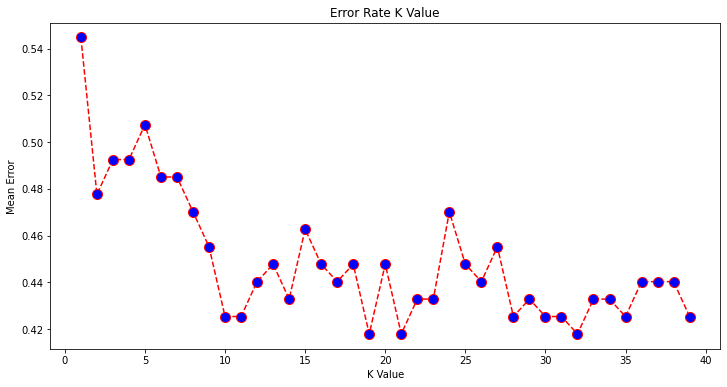

In [12]:
# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [13]:
# KNN Algorithm Evaluation With 5 Neighbors (High Error of .51)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)
df_confusion = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_conf_norm = round(df_confusion / df_confusion.sum(axis=1), 2)
df_conf_norm

67.73


Predicted,1,2,All
Actual,,,
1,0.23,0.26,0.25
2,0.24,0.26,0.25
All,0.47,0.53,0.50


In [14]:
report = classification_report(Y_test, Y_pred, output_dict=True)
report = round(pd.DataFrame(report).T, 2)
report

,precision,recall,f1-score,support
1,0.48,0.45,0.47,66.00
2,0.50,0.53,0.51,68.00
accuracy,0.49,0.49,0.49,0.49
macro avg,0.49,0.49,0.49,134.00
weighted avg,0.49,0.49,0.49,134.00


In [15]:
# KNN Algorithm Evaluation With 19 Neighbors (Lowest Error of .42)
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)
df_confusion = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_conf_norm = round(df_confusion / df_confusion.sum(axis=1), 2)
df_confusion

61.16


Predicted,1,2,All
Actual,,,
1,31,35,66
2,21,47,68
All,52,82,134


In [16]:
report = classification_report(Y_test, Y_pred, output_dict=True)
report = round(pd.DataFrame(report).T, 2)
report

,precision,recall,f1-score,support
1,0.60,0.47,0.53,66.00
2,0.57,0.69,0.63,68.00
accuracy,0.58,0.58,0.58,0.58
macro avg,0.58,0.58,0.58,134.00
weighted avg,0.58,0.58,0.58,134.00


In [17]:
train_eval = pd.DataFrame(knn.predict_proba(X_train))
# train_eval.rename(columns = {0:'Train OFF %', 1:'Train DEF %'}, inplace=True)
train_eval.rename(columns = {1:2, 0:1}, inplace=True)
train_eval.insert(2, 'Prediction', knn.predict(X_train), True)
train_eval = pd.concat([train_eval, X_train_ref], axis=1)
train_eval

,1,2,Prediction,ID,Name,Position,Team,Pick,Year,Team PF,...,Def. Rank RushingYds,Def. Rank RushingTD,Def. Rank RushingY/A,Def. Rank Sc%,Def. Rank TO%,Def. Rank Average DriveStart,Def. Rank Average DriveTime,Def. Rank Average DrivePlays,Def. Rank Average DriveYds,Def. Rank Average DrivePts
0,0.421053,0.578947,2,371,Alex Mack,1,Browns,21,2009,232.0,...,28.0,21.0,25.0,21.0,1.0,25.0,31.0,28.0,29.0,15.0
1,0.421053,0.578947,2,658,Chris McIntosh,1,Seahawks,22,2000,338.0,...,25.0,10.0,21.0,21.0,7.0,11.0,20.0,25.0,16.0,9.0
2,0.473684,0.526316,2,518,Reggie Williams,1,Jaguars,9,2004,276.0,...,2.0,13.0,1.0,11.0,11.0,32.0,20.0,19.0,10.0,24.0
3,0.578947,0.421053,1,197,Mike Evans,1,Buccaneers,7,2014,288.0,...,15.0,8.0,16.0,8.0,7.0,28.0,22.0,18.0,20.0,24.0
4,0.631579,0.368421,1,5,Justin Herbert,1,Chargers,6,2020,337.0,...,18.0,21.0,15.0,15.0,32.0,23.0,29.0,21.0,15.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,0.421053,0.578947,2,85,Rashaan Evans,2,Titans,22,2018,334.0,...,4.0,1.0,4.0,7.0,17.0,16.0,17.0,21.0,12.0,17.0
529,0.684211,0.315789,1,88,Hayden Hurst,1,Ravens,25,2018,395.0,...,15.0,16.0,16.0,28.0,1.0,6.0,5.0,12.0,6.0,5.0
530,0.578947,0.421053,1,585,Wendell Bryant,2,Cardinals,12,2002,295.0,...,24.0,11.0,19.0,12.0,23.0,22.0,30.0,31.0,29.0,24.0
531,0.684211,0.315789,1,145,Ryan Kelly,1,Colts,18,2016,333.0,...,25.0,25.0,23.0,12.0,12.0,17.0,12.0,15.0,21.0,21.0


In [18]:
test_eval = pd.DataFrame(knn.predict_proba(X_test))
test_eval.rename(columns = {1:2, 0:1}, inplace=True)
test_eval.insert(2, 'Prediction', knn.predict(X_test), True)
test_eval = pd.concat([test_eval, X_test_ref], axis=1)
test_eval

,1,2,Prediction,ID,Name,Position,Team,Pick,Year,Team PF,...,Def. Rank RushingYds,Def. Rank RushingTD,Def. Rank RushingY/A,Def. Rank Sc%,Def. Rank TO%,Def. Rank Average DriveStart,Def. Rank Average DriveTime,Def. Rank Average DrivePlays,Def. Rank Average DriveYds,Def. Rank Average DrivePts
0,0.578947,0.421053,1,487,Mike Williams,1,Lions,10,2005,296.0,...,15.0,11.0,8.0,18.0,24.0,3.0,26.0,27.0,19.0,17.0
1,0.473684,0.526316,2,506,Marlin Jackson,2,Colts,29,2005,522.0,...,24.0,13.0,30.0,9.0,4.0,14.0,30.0,31.0,31.0,23.0
2,0.368421,0.631579,2,208,Calvin Pryor,2,Jets,18,2014,290.0,...,3.0,6.0,1.0,14.0,31.0,26.0,15.0,20.0,14.0,17.0
3,0.315789,0.684211,2,532,Marcus Tubbs,2,Seahawks,23,2004,404.0,...,14.0,4.0,9.0,14.0,14.0,8.0,27.0,30.0,18.0,15.0
4,0.473684,0.526316,2,514,Sean Taylor,2,Redskins,5,2004,287.0,...,24.0,29.0,21.0,10.0,14.0,18.0,25.0,23.0,23.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.736842,0.263158,1,74,Minkah Fitzpatrick,2,Dolphins,11,2018,281.0,...,14.0,22.0,17.0,10.0,28.0,18.0,17.0,8.0,14.0,25.0
130,0.473684,0.526316,2,339,Jermaine Gresham,1,Bengals,21,2010,305.0,...,7.0,14.0,7.0,22.0,18.0,26.0,8.0,11.0,5.0,9.0
131,0.684211,0.315789,1,284,A.J. Jenkins,1,49ers,30,2012,380.0,...,1.0,1.0,1.0,32.0,2.0,1.0,2.0,5.0,5.0,1.0
132,0.368421,0.631579,2,629,Willie Middlebrooks,2,Broncos,24,2001,485.0,...,7.0,16.0,29.0,14.0,2.0,5.0,2.0,6.0,22.0,21.0


In [19]:
# As was predicted before with knn.score,
# find ACCURACY of Train with correct predictions out of all predictions
sum([1 if train_eval.loc[i, 'Prediction'] == train_eval.loc[i, 'Position'] else 0 for i in train_eval.index])/len(train_eval.index)

0.6116322701688556

In [20]:
# As was predicted before with Classification Report F1-Score Accuracy, 
# find ACCURACY of Test with correct predictions out of all predictions
sum([1 if test_eval.loc[i, 'Prediction'] == test_eval.loc[i, 'Position'] else 0 for i in test_eval.index])/len(test_eval.index)

0.582089552238806

In [21]:
def get_neighbors(x_df, ref_df, num, name = None, index=None):
    if index and not name:
        distances = knn.kneighbors(x_df.loc[[index]], n_neighbors=num)[0][0]
        neighbors = knn.kneighbors(x_df.loc[[index]], n_neighbors=num)[1][0]
        new = pd.concat([ref_df.loc[neighbors]])
        new.insert(0, 'Distance', distances, True)
        return round(new, 2)
    elif name:
        index = ref_df[ref_df['Name'] == name].index[0]
        distances = knn.kneighbors(x_df.loc[[index]], n_neighbors=num)[0][0]
        neighbors = knn.kneighbors(x_df.loc[[index]], n_neighbors=num)[1][0]
        new = pd.concat([ref_df.loc[neighbors]])
        new.insert(0, 'Distance', distances, True)
        return round(new, 2)

In [22]:
# See closest situations to any given pick+
get_neighbors(X_train, train_eval, 5, 'Joe Burrow')

,Distance,1,2,Prediction,ID,Name,Position,Team,Pick,Year,...,Def. Rank RushingYds,Def. Rank RushingTD,Def. Rank RushingY/A,Def. Rank Sc%,Def. Rank TO%,Def. Rank Average DriveStart,Def. Rank Average DriveTime,Def. Rank Average DrivePlays,Def. Rank Average DriveYds,Def. Rank Average DrivePts
128,0.00,0.74,0.26,1,0,Joe Burrow,1,Bengals,1,2020,...,32.0,27.0,25.0,9.0,27.0,12.0,18.0,15.0,28.0,22.0
96,7.09,0.68,0.32,1,142,Corey Coleman,1,Browns,15,2016,...,30.0,17.0,27.0,2.0,17.0,27.0,25.0,20.0,29.0,31.0
312,7.26,0.68,0.32,1,35,Clelin Ferrell,2,Raiders,4,2019,...,30.0,21.0,22.0,2.0,23.0,27.0,18.0,17.0,29.0,32.0
440,7.67,0.58,0.42,1,55,Josh Jacobs,1,Raiders,24,2019,...,30.0,21.0,22.0,2.0,23.0,27.0,18.0,17.0,29.0,32.0
493,7.69,0.68,0.32,1,4,Tua Tagovailoa,1,Dolphins,5,2020,...,27.0,21.0,22.0,1.0,28.0,27.0,20.0,20.0,26.0,32.0


In [23]:
# Test accuracy of predictions when percentage is over 70%
def test_correct_by_percent(df, percent):
    correct = sum([1 for i in df.index if df.loc[i, 'Prediction'] == df.loc[i, 'Position']
                    and df.loc[i, df.loc[i, 'Prediction']] >= percent])
    total = sum([1 for i in df.index if (df.loc[i, df.loc[i, 'Prediction']] >= percent or
                   df.loc[i, df.loc[i, 'Prediction']] <= 1-percent)])
    
    return (correct, total, round(correct / total, 4))

In [24]:
test_correct_by_percent(train_eval, .66)

(115, 161, 0.7143)

In [25]:
test_correct_by_percent(test_eval, .66)

(25, 39, 0.641)